# Exploratory Data Analysis

This document is dedicated for the exploratory part of the project. We are looking for features that might correlate with the data. So that the machine learning algorithm may learn from the most important data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import helper
import seaborn as sns


%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

![Data Categorization](./pictures/data_categorization.png)


The picture above illustrates how the data is categorized.

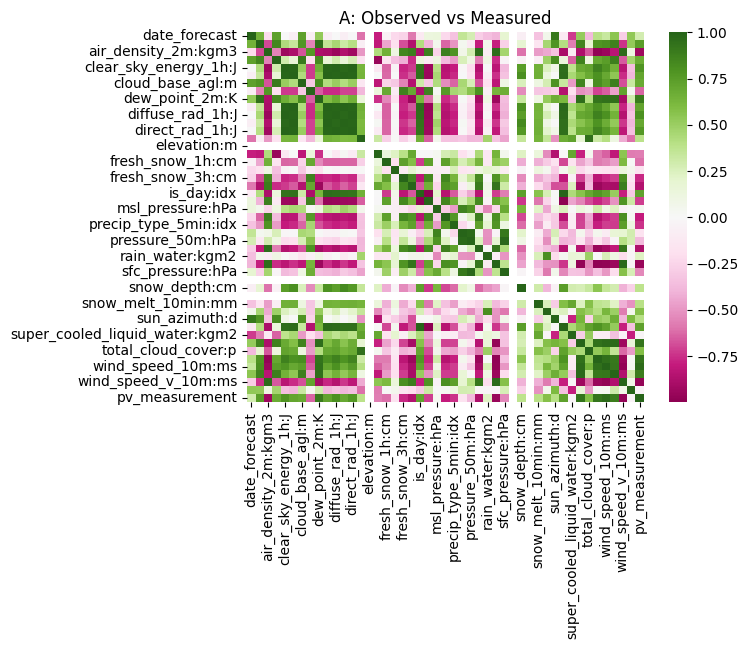

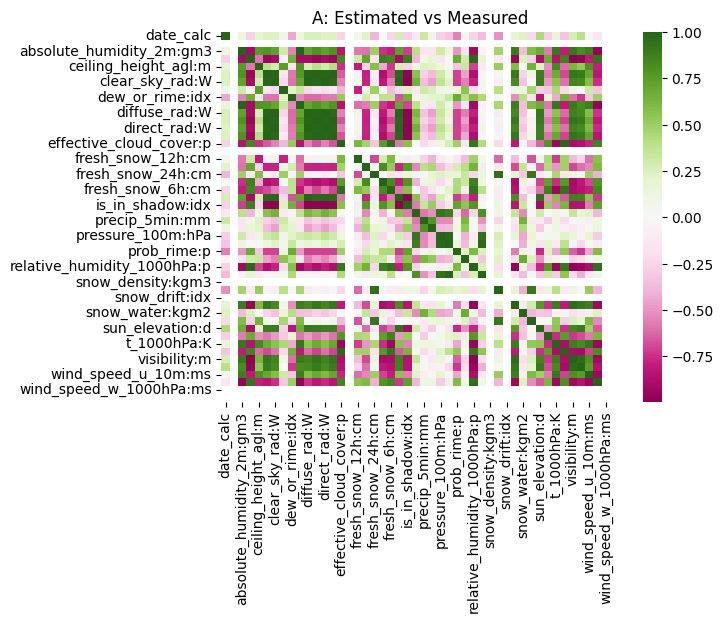

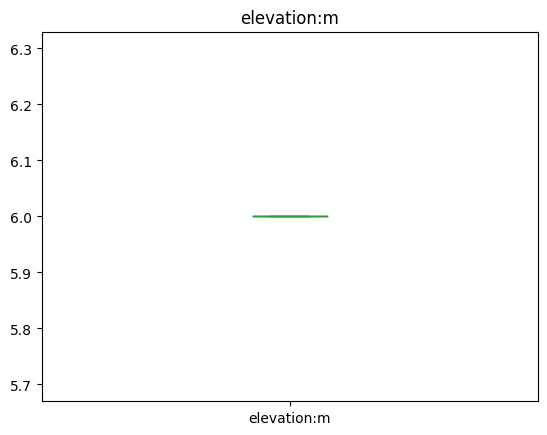

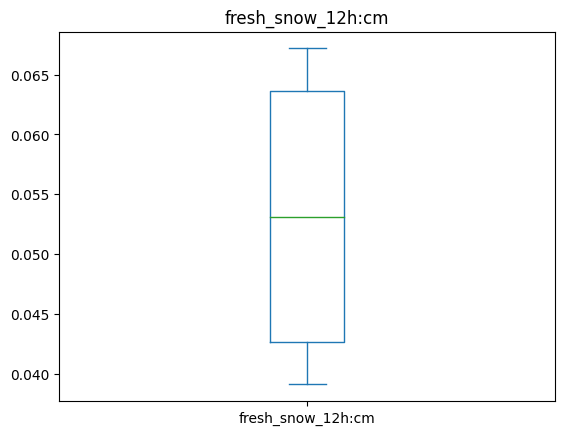

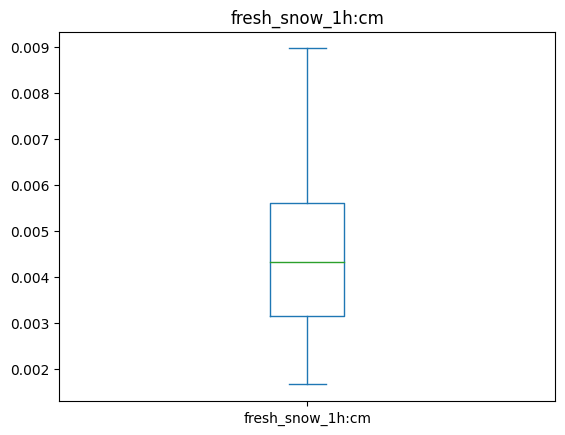

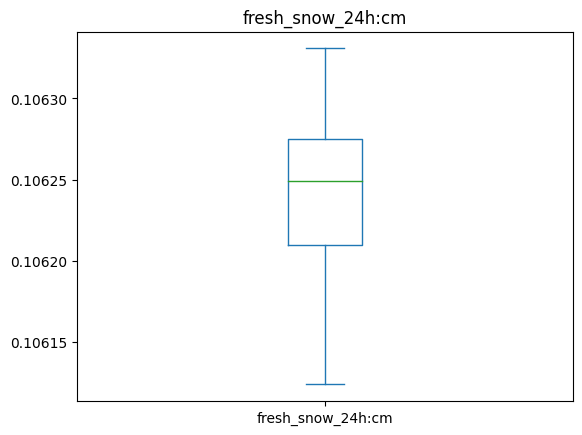

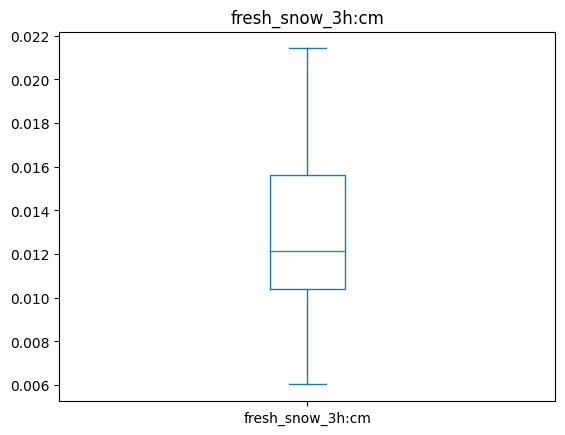

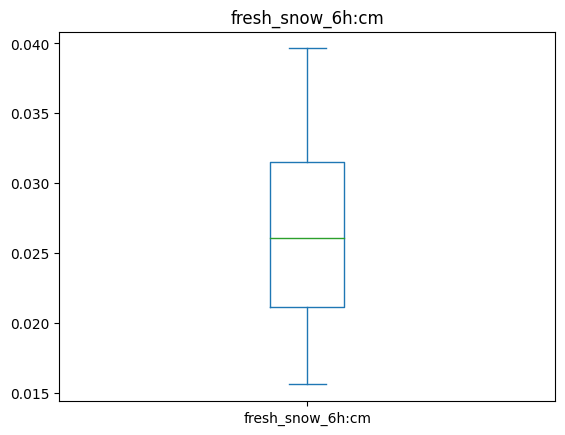

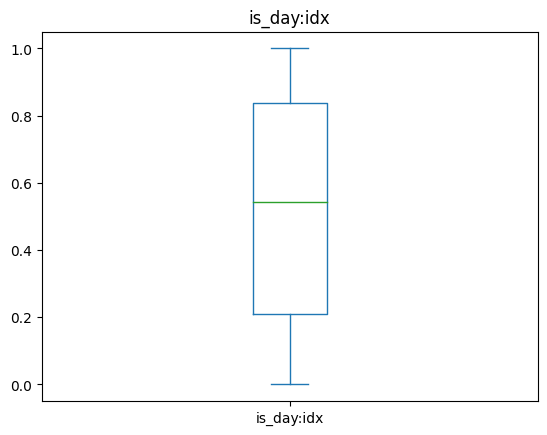

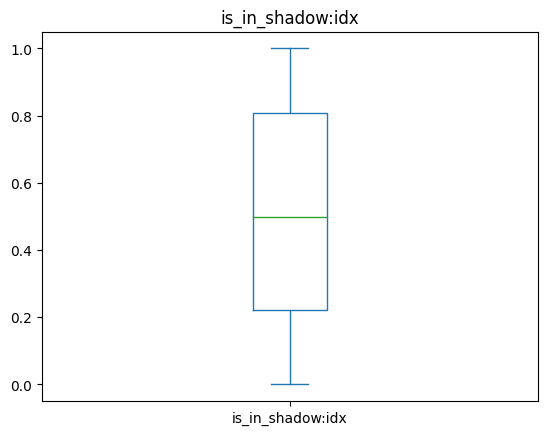

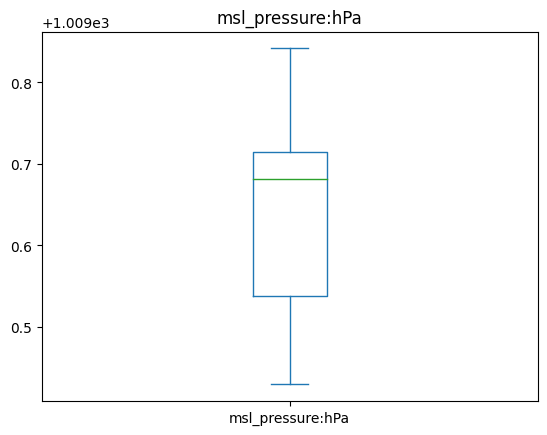

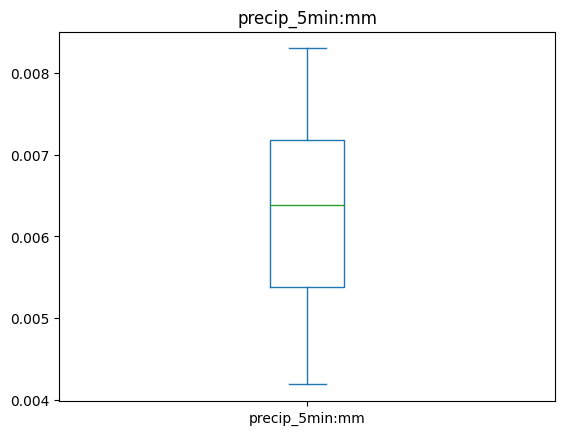

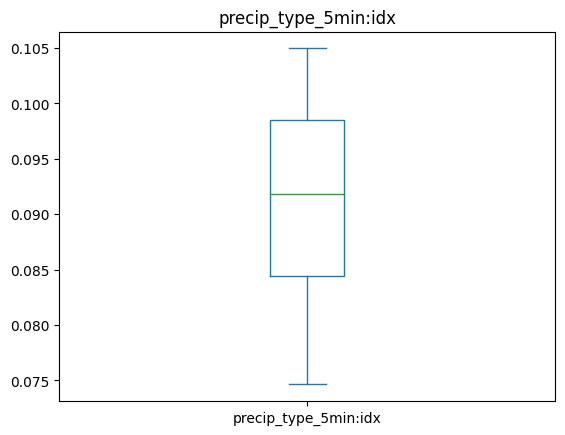

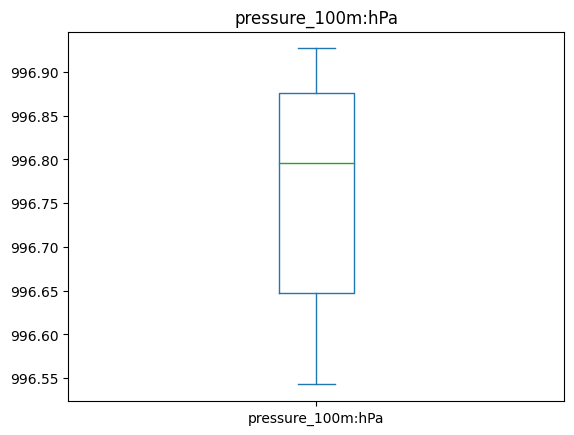

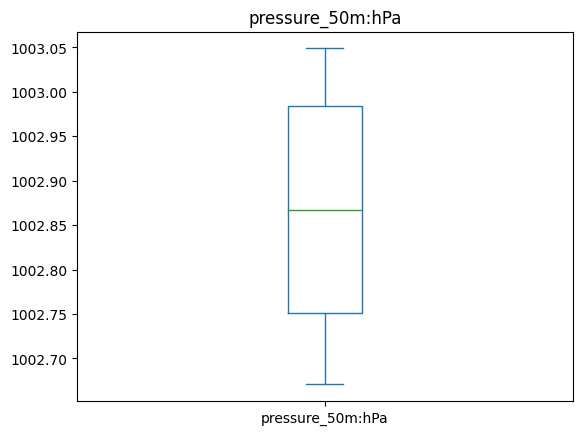

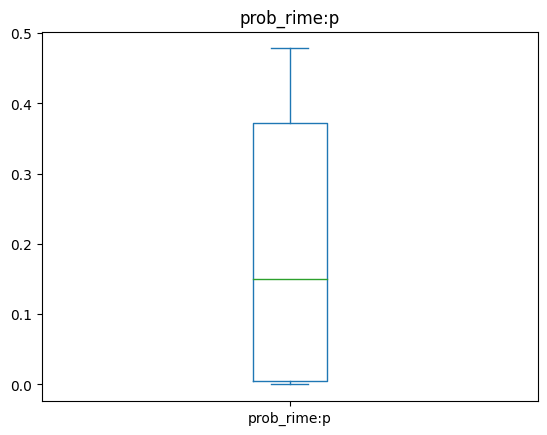

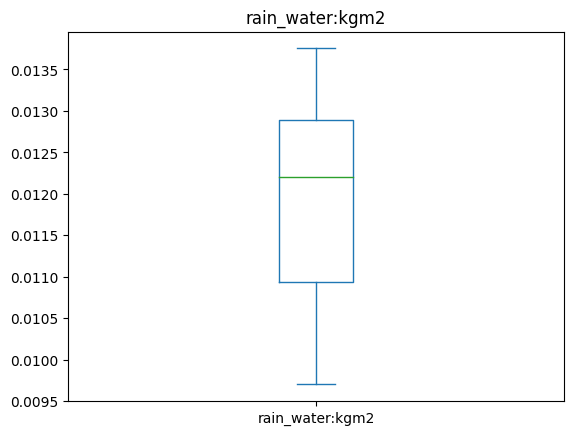

'\nSome thoughts unrelated to the rest.\n    1. Where are we missing data?\n    2. Plot the data for different months?\n    3. How do we catch any unlinear correlations?\n    4. Create Jupyter notebooks each with specific purpose and documntation with what they are used for.\n    5. How do I group the ideas related to time together?\n'

In [17]:
Y_train = pd.read_parquet('A/train_targets.parquet')

X_obs_unformatted_a = pd.read_parquet('A/X_train_observed.parquet')

X_est_unformatted_a = pd.read_parquet('A/X_train_estimated.parquet')

X_test_est_unformatted_a = pd.read_parquet('A/X_test_estimated.parquet')


# The dates separating the Observed and Training data
start_date_obs = datetime.datetime(year=2019, month = 6, day= 2, hour =  22)
end_date_obs   = datetime.datetime(year=2022, month = 10, day= 21, hour = 0)
start_date_est = datetime.datetime(year=2022, month = 10, day= 28, hour = 2)
end_date_est   = datetime.datetime(year=2023, month = 4, day= 30, hour = 23)

# Change into datetime object to make it easier to work with
Y_train["time"] = pd.to_datetime(Y_train["time"])

# Splitting Y into Y_obs and Y_est
mask = (Y_train["time"] >= start_date_obs) & (Y_train["time"] <= end_date_obs)
Y_obs = Y_train.loc[mask]

mask = (Y_train["time"] >= start_date_est) & (Y_train["time"] <= end_date_est)
Y_est = Y_train.loc[mask]

# Reformating data, and storing it so it is easy to access.
X_obs_a = helper.reformat_time(X_obs_unformatted_a, Y_obs)
X_obs_a.to_csv("X_obs_a", sep='\t')

X_est_a = helper.reformat_time(X_est_unformatted_a, Y_est)
X_est_a.to_csv("X_obs_a", sep='\t')

helper.corr_mat(X_obs_a, Y_obs, "A: Observed vs Measured")
helper.corr_mat(X_est_a, Y_est, "A: Estimated vs Measured")

# Lets create some box plots!

eval = ["elevation:m", "fresh_snow_12h:cm", "fresh_snow_1h:cm", "fresh_snow_24h:cm", "fresh_snow_3h:cm",
        "fresh_snow_6h:cm", "is_day:idx", "is_in_shadow:idx", "msl_pressure:hPa", "precip_5min:mm",
        "precip_type_5min:idx", "pressure_100m:hPa", "pressure_50m:hPa", "prob_rime:p", "rain_water:kgm2"]

path = "./pictures/plots/A/obs/"
for label in eval:
    X_obs_a[label].plot.box()
    plt.title(label)
    plt.savefig(path + label.replace(":","") +".png", bbox_inches='tight')
    plt.show()


"""
Some thoughts unrelated to the rest.
    1. Where are we missing data?
    2. Plot the data for different months?
    3. How do we catch any unlinear correlations?
    4. Create Jupyter notebooks each with specific purpose and documntation with what they are used for.
    5. How do I group the ideas related to time together?
"""

### Differences between the measured data
There is a difference between the trained data, and this is mainly that "X_trained_observed" has one less category than the 2 other X-values. Why this is remains however unclear.

In [ ]:
"""
Looking for differences between the categories of each set.
"""

"""
Should especially look at the various ... 
1. Clearly plot missing data.
2. Find gaps in missing data. 
3. Compare the different time data.
"""
dif = list(set(X_train_observed_a.columns.values) - set(X_train_estimated_a.columns.values))
print("\n The differences between X_TRAIN_OBSERVED_A and X_TRAIN_ESTIMATED_A:", dif)

dif = list(set(X_test_estimated_a.columns.values) - set(X_train_observed_a.columns.values))
print("\n The differences between X_TRAIN_OBSERVED_A and X_TEST_ESTIMATED_A:", dif)

dif = list(set(X_train_estimated_a.columns.values) - set(X_test_estimated_a.columns.values))
print("\n The differences between X_TEST_ESTIMATED_A and X_TRAIN_ESTIMATED_A:", dif)



"""
This is intended to be a function that has the capabilities to see gaps!
"""

# Y_dates = train_a["time"]
# print(Y_dates)

# dates = pd.concat([X_train_observed_a["date_forecast"], X_train_estimated_a["date_forecast"], X_test_estimated_a["date_forecast"]], axis=0)
# print("This is last element:", X_test_estimated_a["date_forecast"].iloc[-1])

# datetime_obj = dates.iloc[0]
# print(datetime_obj)
# missing_dates = helper.find_missing_dates(dates, 0, 15)
# print(missing_dates[-20:-1])


![Data Categorization](./pictures/model_testing_procedure.png)
The picture above describes the procedure that will be used to test the model.